In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize


In [2]:
def f(x):
    """Original function f(x) = x²(x-1)(x+1)"""
    return x**2 * (x - 1) * (x + 1)


In [3]:
def negative_objective(x, lambda_val):
    """Helper function for computing conjugate. We minimize -(λx - f(x))"""
    return -(lambda_val * x - f(x))


In [4]:
def f_conjugate(lambda_val):
    """
    Compute the convex conjugate (Fenchel conjugate) of f at λ
    f*(λ) = sup{λx - f(x)} = -min{f(x) - λx}
    """
    # We need to find the supremum over all x
    # This is equivalent to finding the minimum of the negative
    result = minimize(negative_objective, x0=0, args=(lambda_val,), method="BFGS")
    return -result.fun


In [5]:
# Create values for plotting
lambda_vals = np.linspace(-2, 2, 100)
x_vals = np.linspace(-2, 2, 100)

# Compute conjugate values
conjugate_vals = np.array([f_conjugate(l) for l in lambda_vals])


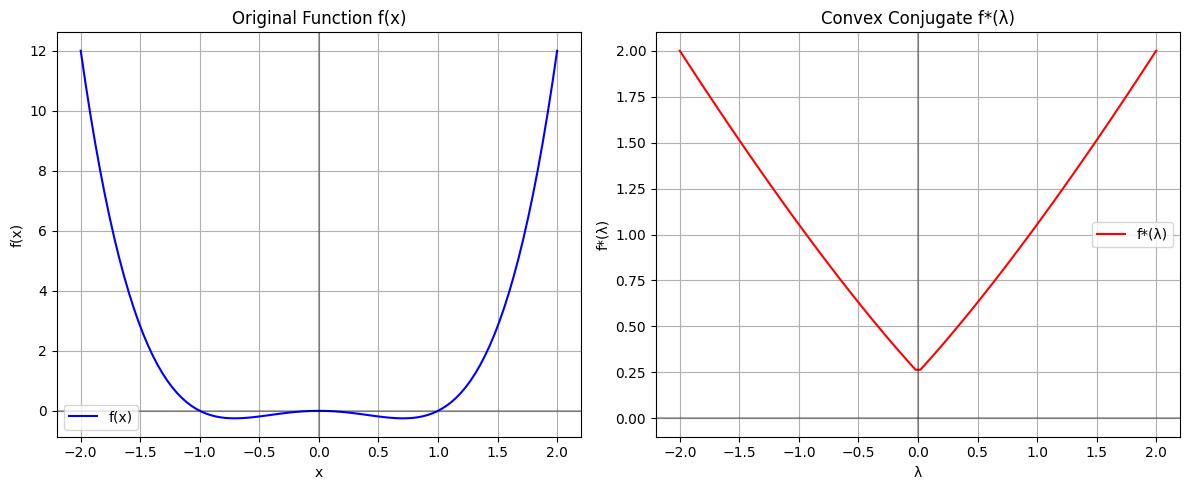

In [6]:
# Create the figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
s
# Plot original function f(x)
ax1.plot(x_vals, [f(x) for x in x_vals], "b-", label="f(x)")
ax1.grid(True)
ax1.set_title("Original Function f(x)")
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.legend()
ax1.axhline(y=0, color="k", linestyle="-", alpha=0.3)
ax1.axvline(x=0, color="k", linestyle="-", alpha=0.3)

# Plot conjugate function f*(λ)
ax2.plot(lambda_vals, conjugate_vals, "r-", label="f*(λ)")
ax2.grid(True)
ax2.set_title("Convex Conjugate f*(λ)")
ax2.set_xlabel("λ")
ax2.set_ylabel("f*(λ)")
ax2.legend()
ax2.axhline(y=0, color="k", linestyle="-", alpha=0.3)
ax2.axvline(x=0, color="k", linestyle="-", alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()

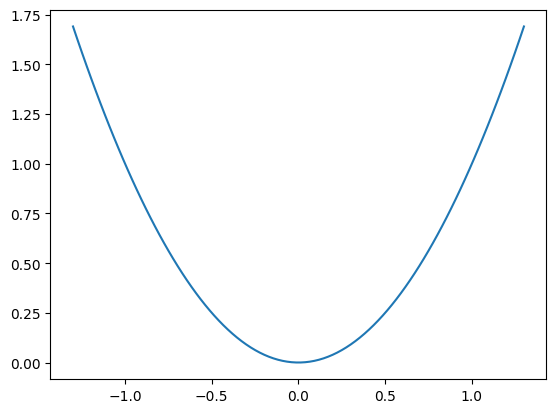

In [15]:
f = lambda x: x**2  # * (x - 1) * (x + 1)

xx = np.linspace(-1.3, 1.3, 100)
yy = f(xx)
plt.plot(xx, yy);

Text(0.5, 1.0, 'f^*(y)')

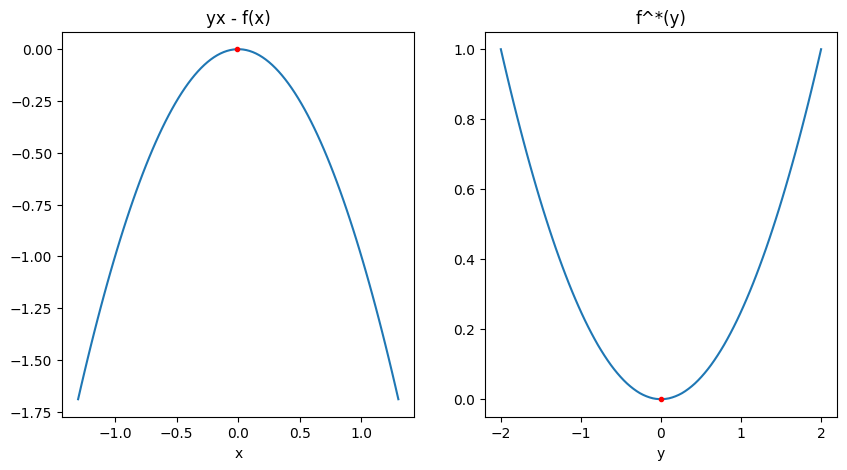

In [18]:
res = 100
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
xx = np.linspace(-1.3, 1.3, res)

y = 0


def f(x):
    return x**2  # * (x - 1) * (x + 1)


def fstar(x, y):
    return x * y - f(x)


yy = fstar(xx, y)
(l1,) = axes[0].plot(xx, yy)

idx_star = np.argmax(yy)
x_star = xx[idx_star]
y_star = np.max(yy)

(l2,) = axes[0].plot(x_star, y_star, ".", color="red")

axes[0].set_xlabel("x")
axes[0].set_title("yx - f(x)")

y_range = np.linspace(-2, 2, res)
fstar_all = np.zeros(res)
for idx, ys in enumerate(y_range):
    fstar_all[idx] = np.max(fstar(xx, ys))

axes[1].plot(y_range, fstar_all)
(l3,) = axes[1].plot(y, y_star, ".", color="red")

axes[1].set_xlabel("y")
axes[1].set_title("f^*(y)")

In [7]:
def f(x):
    return -(0.1875 * x - (x**4 - x**2))


In [8]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f, bounds=(-2, 2), method="bounded")
res.fun

np.float64(-0.3867187499975964)

In [15]:
-f(res.x), -f(-res.x)


(np.float64(0.3867187499975964), np.float64(0.10546912724464436))

In [10]:
f(-res.x)


np.float64(-0.10546912724464436)